# Loan Default Analysis
### Comprehensive Exploratory Data Analysis (EDA)

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# Define the file paths
loan_file_path = r'C:\Users\3913\Desktop\Loan Analysis\loan.csv'
data_dict_file_path = r'C:\Users\3913\Desktop\Loan Analysis\Data_Dictionary.csv'

# Load the loan dataset
loan_data = pd.read_csv(loan_file_path, low_memory=False)

# Display basic information about the loan dataset
print(loan_data.info())
print(loan_data.head())

# Load the Data Dictionary
data_dict = pd.read_csv(data_dict_file_path)

# Display the first few rows of the Data Dictionary
print(data_dict.head())


In [2]:
# Check and handle missing values
missing_values = loan_data.isnull().sum().sort_values(ascending=False)
columns_to_drop = missing_values[missing_values > 0.9 * len(loan_data)].index.tolist() + ['id', 'member_id']
loan_data_cleaned = loan_data.drop(columns=columns_to_drop, axis=1)
print(loan_data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

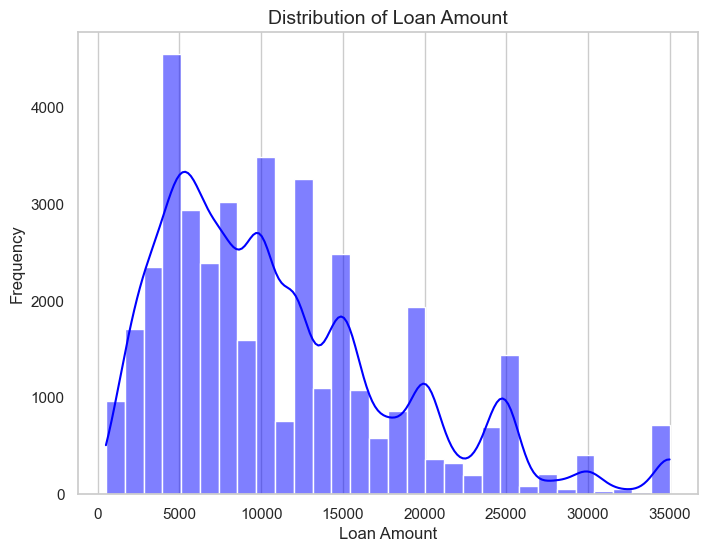

In [3]:
# Univariate Analysis: Loan Amount
plt.figure(figsize=(8, 6))
sns.histplot(loan_data_cleaned['loan_amnt'], bins=30, kde=True, color='blue')
plt.title('Distribution of Loan Amount', fontsize=14)
plt.xlabel('Loan Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()

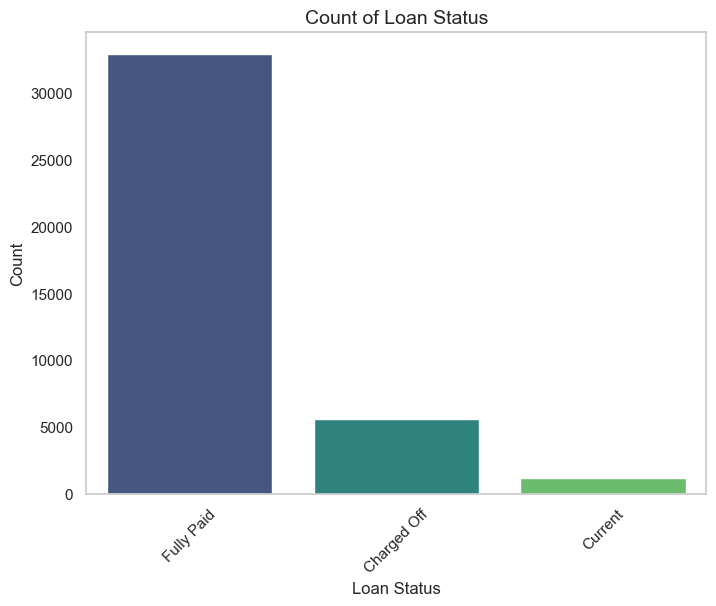

In [5]:
# Loan Status Count
plt.figure(figsize=(8, 6))
loan_status_counts = loan_data_cleaned['loan_status'].value_counts()

# Explicitly set hue and remove legend
sns.barplot(
    x=loan_status_counts.index,
    y=loan_status_counts.values,
    hue=loan_status_counts.index,  # Assign `x` to `hue` as suggested
    dodge=False,
    palette='viridis',
    legend=False
)

plt.title('Count of Loan Status', fontsize=14)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


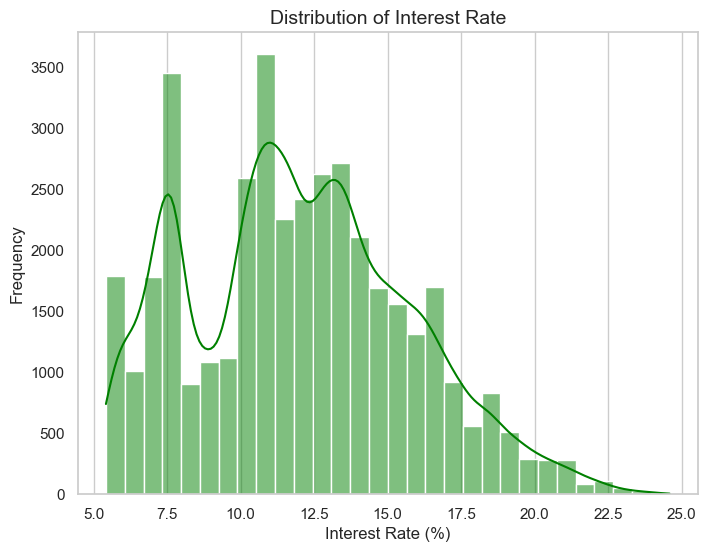

In [6]:
# Interest Rate Distribution
loan_data_cleaned['int_rate'] = loan_data_cleaned['int_rate'].str.replace('%', '').astype(float)
plt.figure(figsize=(8, 6))
sns.histplot(loan_data_cleaned['int_rate'], bins=30, kde=True, color='green')
plt.title('Distribution of Interest Rate', fontsize=14)
plt.xlabel('Interest Rate (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()

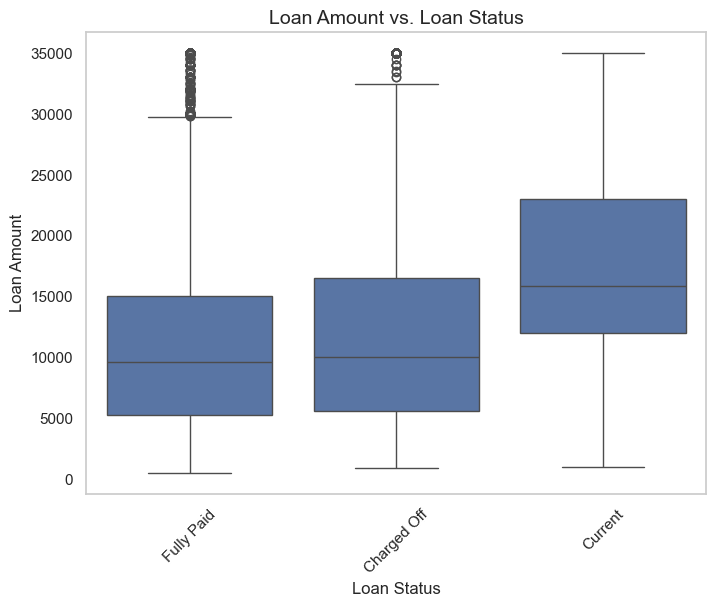

In [8]:
# Loan Amount vs. Loan Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data_cleaned)
plt.title('Loan Amount vs. Loan Status', fontsize=14)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


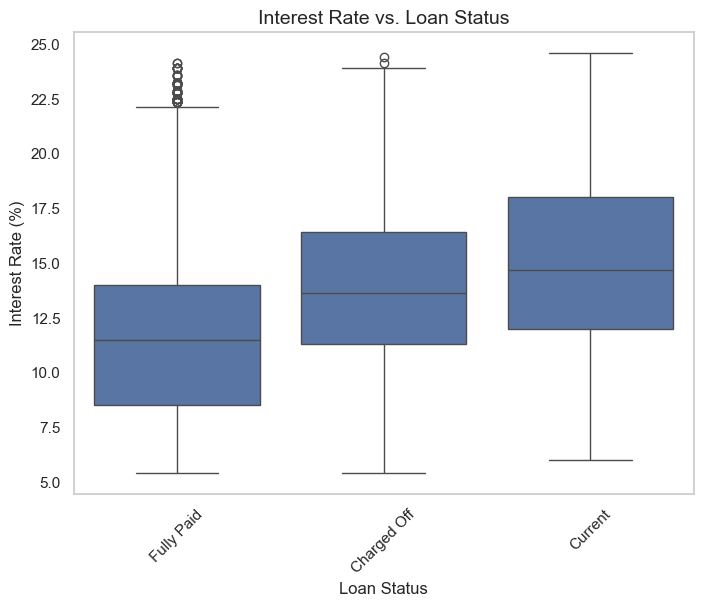

In [10]:
# Interest Rate vs. Loan Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='int_rate', data=loan_data_cleaned)
plt.title('Interest Rate vs. Loan Status', fontsize=14)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Interest Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


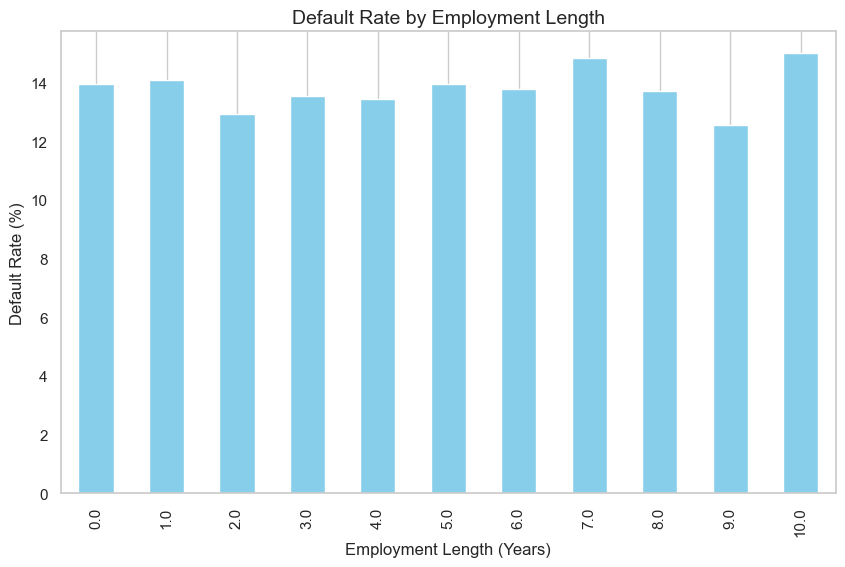

In [13]:
# Default Rate by Employment Length
# Clean and transform the 'emp_length' column
# Ensure the column contains strings for processing
loan_data_cleaned['emp_length'] = loan_data_cleaned['emp_length'].astype(str)

# Replace non-numeric employment lengths and extract numeric values
loan_data_cleaned['emp_length'] = loan_data_cleaned['emp_length'].replace({'10+ years': '10 years', '< 1 year': '0 years', 'nan': None})
loan_data_cleaned['emp_length'] = loan_data_cleaned['emp_length'].str.extract(r'(\d+)').astype(float)

# Calculate the default rate by employment length
default_rate_by_emp_length = (
    loan_data_cleaned[loan_data_cleaned['loan_status'] == 'Charged Off']
    .groupby('emp_length')['loan_status']
    .count() / loan_data_cleaned.groupby('emp_length')['loan_status'].count() * 100
)

# Plot the default rate by employment length
plt.figure(figsize=(10, 6))
default_rate_by_emp_length.plot(kind='bar', color='skyblue')
plt.title('Default Rate by Employment Length', fontsize=14)
plt.xlabel('Employment Length (Years)', fontsize=12)
plt.ylabel('Default Rate (%)', fontsize=12)
plt.grid(axis='y')
plt.show()



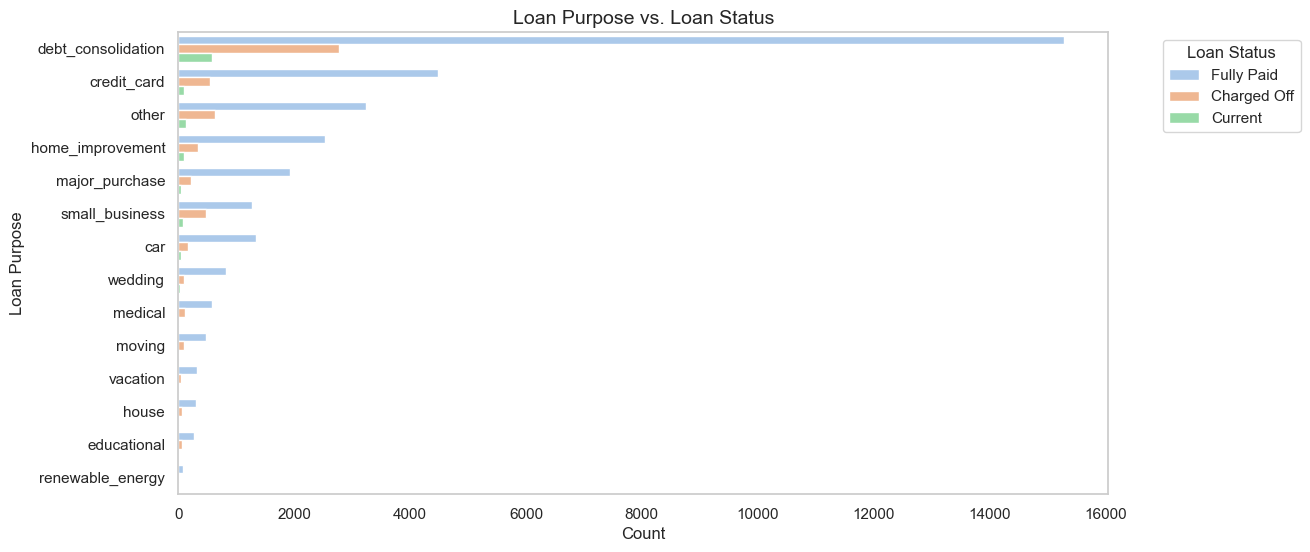

In [14]:
# Loan Purpose vs. Loan Status
plt.figure(figsize=(12, 6))
sns.countplot(y='purpose', hue='loan_status', data=loan_data_cleaned, palette='pastel', order=loan_data_cleaned['purpose'].value_counts().index)
plt.title('Loan Purpose vs. Loan Status', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Loan Purpose', fontsize=12)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x')
plt.show()

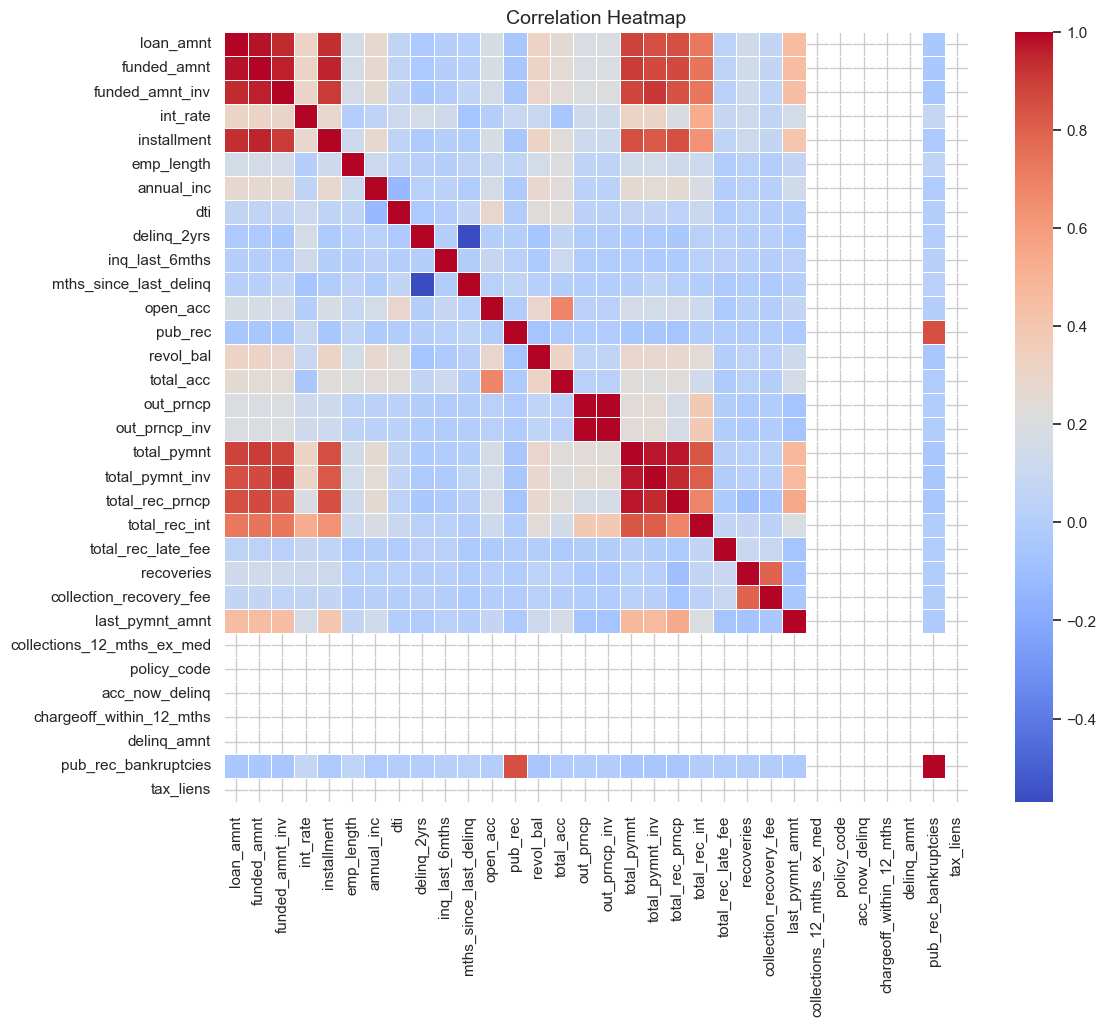

In [15]:
# Correlation Heatmap
numeric_columns = loan_data_cleaned.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_columns, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()